In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import h5py
import json
import matplotlib 
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import LinearLocator,FormatStrFormatter

import os
import sys  
import ast

from ast import literal_eval

from qutip import  *

sys.path.append('../../scripts') 

from qutip_tools import *


In [2]:
# define basic figure sizes
bwidth=7.5
bheight=5
base_font = 30

matplotlib.rcParams.update({'font.size': base_font,"legend.fontsize":base_font-5 ,"font.family": "serif", 
                            "font.serif": "CMU Serif, Times New Roman",
                           'text.usetex' : True })

sns.set_palette("colorblind")

fig_route = "../../plots/for_poster/"


# Misc.

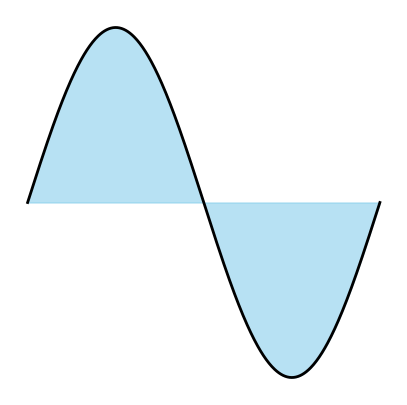

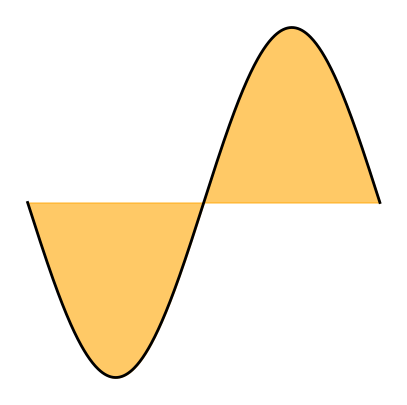

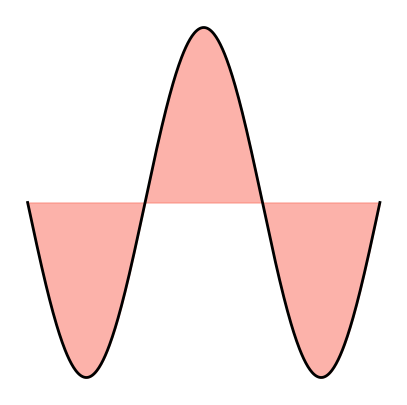

In [3]:
fig, ax = plt.subplots(1,1,figsize=(bheight,bheight))
# Create a sine wave
x = np.linspace(0, 2*np.pi, 500)
y = np.sin(x)

# Plot the line
plt.plot(x, y, color='black', linewidth=2)

# Fill the area under the curve
"skyblue"
"orange"
"salmon"
plt.fill_between(x, y, color='skyblue', alpha=0.6)

ax.set_xticks([])
ax.set_yticks([])

ax.spines[['right', 'top','bottom', 'left']].set_visible(False)
ax.set_ylabel("")

plt.savefig(fig_route+"sawblue.pdf", transparent=True)

fig, ax = plt.subplots(1,1,figsize=(bheight,bheight))

# Create a sine wave
x = np.linspace(np.pi, 3*np.pi, 500)
y = np.sin(x)

# Plot the line
plt.plot(x, y, color='black', linewidth=2)


plt.fill_between(x, y, color='orange', alpha=0.6)

ax.set_xticks([])
ax.set_yticks([])

ax.spines[['right', 'top','bottom', 'left']].set_visible(False)
ax.set_ylabel("")

plt.savefig(fig_route+"saworange.pdf", transparent=True)


fig, ax = plt.subplots(1,1,figsize=(bheight,bheight))

# Create a sine wave
x = np.linspace(-np.pi, 2*np.pi, 500)
y = np.sin(x)

# Plot the line
plt.plot(x, y, color='black', linewidth=2)

# Fill the area under the curve
"skyblue"
"orange"
"salmon"
plt.fill_between(x, y, color='salmon', alpha=0.6)

ax.set_xticks([])
ax.set_yticks([])

ax.spines[['right', 'top','bottom', 'left']].set_visible(False)
ax.set_ylabel("")

plt.savefig(fig_route+"sawsalmon.pdf", transparent=True)

# Exact Diag

In [19]:
J=1

data_df = pd.read_csv('../../data/exp_pro/exact_diag_L=60.csv')

data_df = data_df.drop(["Unnamed: 0"], axis=1).drop_duplicates()
data_df["times"] = data_df["times"].apply(lambda x: [float(i) for i in ast.literal_eval(x)])
data_df["entropy"] = data_df["entropy"].apply(lambda x: [float(i) for i in ast.literal_eval(x)])

print("Number of data points:", len(data_df))
print(data_df.columns)
# read as float
data_df.head()


Number of data points: 146
Index(['L_qpc', 'Omega', 't', 'J', 'Jp', 'bond_index', 'K0', 'X0', 'Spread',
       'maxt_time', 'del_tau', 'qubit_init', 'Re_qubit_0', 'Im_qubit_0',
       'Re_qubit_1', 'Im_qubit_1', 'phi', 'alfabond', 'times', 'occupations',
       'd0_density', 'qubit_rho', 'entropy', 'time_at_bond', 'Max_entropy',
       'cos_theta', 'sin_phi'],
      dtype='object')


,L_qpc,Omega,t,J,Jp,bond_index,K0,X0,Spread,maxt_time,...,alfabond,times,occupations,d0_density,qubit_rho,entropy,time_at_bond,Max_entropy,cos_theta,sin_phi
0,60,0.3,0.001,1.0,1.0,30,0.785398,11,6.0,60.0,...,0.942478,"[0.0, 0.15037593, 0.30075186, 0.45112783, 0.60...",[[3.27337137e-03 2.40466162e-03 1.67642592e-03...,[0.8046544 0.80453515 0.8044159 0.80429655 0...,[[[ 8.04654419e-01-1.38046813e-24j -1.49604585...,"[2.7153167e-14, 6.0630825e-08, 2.5037454e-07, ...",7.987913,0.233134,"[(0.6093087921382336-2.760936172267881e-24j), ...","[(0.9999999999999526-2.6755975503354732e-24j),..."
1,60,0.3,0.100,1.0,1.0,30,1.570796,11,6.0,60.0,...,0.942478,"[0.0, 0.15037593, 0.30075186, 0.45112783, 0.60...",[[3.27337137e-03 2.13364419e-03 1.31131895e-03...,[0.787774 0.7999393 0.81183326 0.8234452 0...,[[[ 7.87774026e-01+1.00710714e-32j -1.16527551...,"[2.8933574e-15, 6.609773e-08, 2.812171e-07, 6....",5.028125,0.145675,"[(0.5755480130952302+2.0142142537442937e-32j),...",[(-0.9999999999999971-1.7335126320266467e-32j)...
2,60,0.3,0.010,1.0,1.0,30,1.413717,11,6.0,60.0,...,2.513274,"[0.0, 0.15037593, 0.30075186, 0.45112783, 0.60...",[[3.2733714e-03 2.1444145e-03 1.3249924e-03 .....,[0.15914059 0.15804197 0.15694642 0.15585399 0...,[[[ 1.59140587e-01+7.41118858e-26j 2.71624831...,"[-4.5607545e-15, 5.434689e-08, 2.3559393e-07, ...",5.171798,0.084539,[(-0.6817188189315473+1.4822377638977338e-25j)...,"[(1.0000000000000016-1.8878123014282895e-25j),..."
3,60,0.3,0.100,1.0,1.0,30,1.099557,11,6.0,60.0,...,0.942478,"[0.0, 0.15037593, 0.30075186, 0.45112783, 0.60...",[[3.2733714e-03 2.2308431e-03 1.4372291e-03 .....,[0.6858568 0.6997308 0.7134241 0.72692436 0...,[[[ 6.85856819e-01+3.17161664e-18j 3.55587354...,"[1.1820754e-14, 8.337445e-08, 3.507302e-07, 8....",5.834771,0.177069,[(0.37171366557869745+6.3432332784582864e-18j)...,"[(-0.999999999999991-2.7358868500616696e-18j),..."
4,60,0.3,1.000,1.0,1.0,30,1.570796,11,6.0,60.0,...,0.942478,"[0.0, 0.15037593, 0.30075186, 0.45112783, 0.60...",[[3.27337137e-03 2.13364419e-03 1.31131895e-03...,[8.5119963e-01 7.3000687e-01 5.8816600e-01 4.3...,[[[8.51199627e-01+2.62175262e-33j 2.64512952e-...,"[3.0501737e-15, 6.60493e-08, 3.3970448e-07, 9....",3.817940,0.117500,"[(0.7023992031304087+5.2435053346874115e-33j),...","[(0.9999999999999948+7.269595183314079e-33j), ..."


In [20]:
Om_ = 0.3 
x0_ = 11
t_ = 0.1

af = data_df["alfabond"].sort_values().unique()[3]
print(data_df["alfabond"].sort_values().unique())
print(data_df["L_qpc"].unique())
LL = data_df["L_qpc"].unique()[0]
J = data_df["J"].unique()[0]

# For the vertical line cut
cond_ = (data_df["Omega"]==Om_) & (data_df["t"]==t_)  & (data_df["X0"]==x0_)  & (data_df["alfabond"]==af)
ver_df = data_df[cond_].sort_values(by="K0")
K0_unique = ver_df["K0"].unique()
colors = plt.cm.Blues(np.linspace(0.0,1.0,len(K0_unique)))

# For the horizontal line cut
k0_ = K0_unique[-2]
cond_ = (data_df["Omega"]==Om_) & (data_df["K0"]==k0_)  & (data_df["X0"]==x0_)  & (data_df["alfabond"]==af) 
hor_df = data_df[cond_].sort_values(by="t")
t_unique = hor_df["t"].unique()
colors_hor = plt.cm.Greens(np.linspace(0.0,0.9,len(t_unique)))
colors_hor = colors_hor[::-1]
t_unique

[0.         0.31415927 0.62831853 0.9424778  1.25663706 1.57079633
 1.88495559 2.19911486 2.51327412 2.82743339 3.14159265]
[60]


array([1.e-04, 1.e-03, 1.e-02, 5.e-02, 7.e-02, 1.e-01, 2.e-01, 3.e-01,
       5.e-01, 7.e-01, 1.e+00, 2.e+00])

In [21]:
cond_ = (data_df["Omega"]==Om_) & (data_df["qubit_init"]=="fixed") & (data_df["X0"]==11) & (data_df["alfabond"]==af)
data_S = data_df[cond_].sort_values(by="K0")

S_df = data_S.pivot(index='K0', columns='t', values='Max_entropy')
S_df

t,0.0001,0.0010,0.0100,0.0500,0.0700,0.1000,0.2000,0.3000,0.5000,0.7000,1.0000,2.0000
K0,,,,,,,,,,,,
0.471239,0.378591,0.382068,0.415725,0.426028,0.416005,0.382270,0.225531,0.172648,0.153021,0.134132,0.111909,0.007190
0.628319,0.292540,0.294171,0.310064,0.333785,0.326709,0.320143,0.267124,0.164102,0.116321,0.100892,0.084164,0.006787
0.785398,0.232374,0.233134,0.240518,0.258057,0.257765,0.255127,0.254386,0.206834,0.098269,0.084402,0.073352,0.006468
0.942478,0.193234,0.193632,0.197474,0.208230,0.209120,0.207468,0.208291,0.212581,0.125515,0.074243,0.066421,0.006191
1.099557,0.168280,0.168522,0.170845,0.177588,0.178379,0.177069,0.170180,0.176914,0.166900,0.086850,0.065787,0.005822
1.256637,0.152916,0.153088,0.154712,0.159340,0.159862,0.158688,0.148483,0.146877,0.162429,0.132858,0.074072,0.005984
1.413717,0.144554,0.144693,0.146004,0.149623,0.149959,0.148798,0.137719,0.131569,0.140363,0.156192,0.098811,0.005677
1.570796,0.141898,0.142028,0.143249,0.146568,0.146842,0.145675,0.134441,0.126993,0.132396,0.153286,0.117500,0.005842


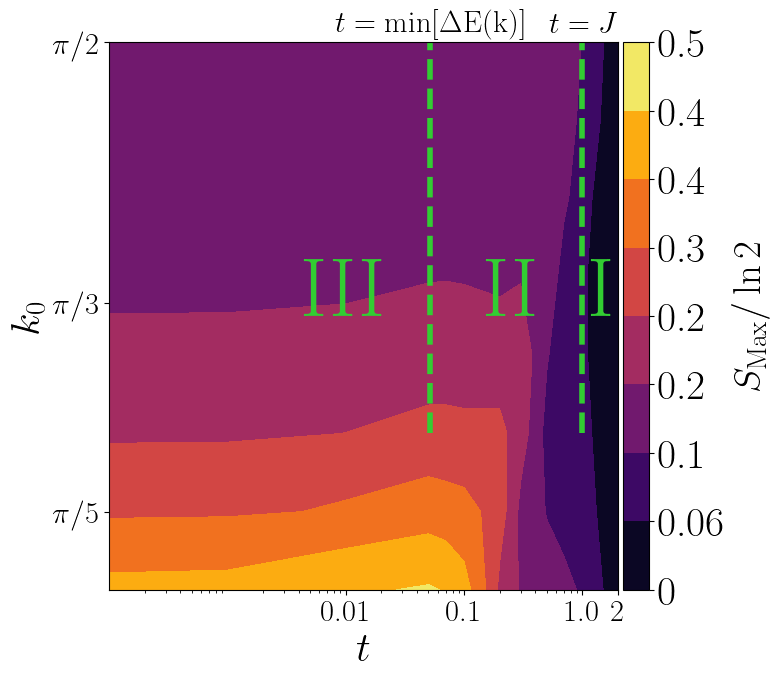

In [23]:
fig, ax = plt.subplots(1,1,figsize=(bwidth+1,bwidth))

vg_array = S_df.index
t_array = S_df.columns
im = ax.contourf(t_array, vg_array, S_df.values, cmap="inferno")
plt.xscale('log')

# Add anotate the regions
y_tick = np.pi/2 -0.04
ax.annotate(
    r'$t=\rm{min}[ \Delta E(k)]$', 
    xy=(np.pi/(LL+1), y_tick), 
    xytext=(np.pi/(LL+1), y_tick + 0.06), fontsize=22,ha='center')
ax.annotate(
    r'$t=J$', 
    xy=(J, y_tick), 
    xytext=(J, y_tick + 0.06), fontsize=22,ha='center')

# Add the labels for each region
ax.annotate('II', xy=(0.2+np.pi/50, 0.65*np.pi/2), 
            xytext=(0.2+np.pi/50, 0.65*np.pi/2),ha='center', c="limegreen", fontsize= 60,fontweight='bold')

ax.annotate('III', xy=(0.01, 0.65*np.pi/2), 
            xytext=(0.01, 0.65*np.pi/2),ha='center', c="limegreen", fontsize= 60,fontweight='bold')

ax.annotate('I', xy=(1.5, 0.65*np.pi/2), 
            xytext=(1.5, 0.65*np.pi/2),ha='center', c="limegreen", fontsize= 60,fontweight='bold')

ax.vlines([np.pi/(LL+1), J], ymin=0.5*np.pi/2, ymax=np.pi/2, color='limegreen', lw=4, linestyle="dashed", clip_on=False)  # tick-like line

ax.set_xticks( [0.01,0.1,1.0,2], [0.01,0.1,1.0,2] ,fontsize=22)
ax.set_yticks( [np.pi/5,np.pi/3,np.pi/2], labels=[r"$\pi/5$",r"$\pi/3$",r"$\pi/2$"],fontsize=22 )

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im, cax, shrink=0.9)   
cbar.ax.set_ylabel(r'$S_{\rm{Max}}/\ln{2}$', rotation=90, fontsize=28)
cbar.ax.yaxis.set_major_formatter(FormatStrFormatter('%.1g'))


ax.set_ylabel(r"$k_0$",fontweight='bold',fontsize=30)
ax.set_xlabel(r"$t$",fontweight='bold',fontsize=30)

plt.tight_layout()

plt.savefig(fig_route+"entropy_phase_diagram_exact_L=60.pdf",transparent=True)

# MPS

In [8]:
# data_route = "../../data/MPS/L=100/"
J=1

In [9]:
data_df = pd.read_csv('../../data/exp_pro/TEBD_data_L=100.csv')
data_df = data_df.drop(["Unnamed: 0"], axis=1).drop_duplicates()
data_df["times"] = data_df["times"].apply(lambda x: [float(i) for i in ast.literal_eval(x)])
data_df["entropy"] = data_df["entropy"].apply(lambda x: [float(i) for i in ast.literal_eval(x)])

print("Number of data points:", len(data_df))
print(data_df.columns)
# read as float
data_df.head()


Number of data points: 89
Index(['Omega', 'X0', 'computation_time', 'L_qpc', 'cutoff', 't', 'bond_index',
       'max_time', 'K0', 'qubit_init', 'Spread', 'alfabond', 'J', 'evol_type',
       'del_tau', 'type', 'phi', 'times', 'occupations', 'd0_density',
       'qubit_rho', 'entropy', 'time_at_bond', 'Max_entropy', 'cos_theta',
       'sin_phi', 'bond_dimension'],
      dtype='object')


,Omega,X0,computation_time,L_qpc,cutoff,t,bond_index,max_time,K0,qubit_init,...,times,occupations,d0_density,qubit_rho,entropy,time_at_bond,Max_entropy,cos_theta,sin_phi,bond_dimension
0,0.3,25,1340.002090,100,1.000000e-18,0.800,50,70.710678,0.785398,fixed,...,"[0.0, 0.07, 0.14, 0.21, 0.28, 0.35, 0.42, 0.49...",[[1.05818625e-08 8.69962147e-09 7.07433356e-09...,[[0.2021022 0.24885032 0.29874557 ... 0.87420...,[[[ 7.9789770e-01+2.7755576e-16j -2.0122792e-1...,"[1.9220558e-15, 1.03903275e-11, 4.584702e-11, ...",8.643728,0.080252,"[(0.5957954311730056+5.551115123125783e-16j), ...","[(0.9999997456356324+2.9968790373374003e-18j),...",[116. 3. 3. 3. 3. 3. 3. 3. 3. ...
1,0.3,25,937.310122,100,1.000000e-18,0.300,50,50.000000,1.570796,fixed,...,"[0.0, 0.07, 0.14, 0.21, 0.28, 0.35, 0.42, 0.49...",[[1.05818625e-08 8.04748712e-09 6.04657568e-09...,[[0.9813025 0.9865655 0.99097025 ... 0.02105...,[[[ 1.8697474e-02+1.3986208e-17j -1.9428903e-1...,"[5.0922072e-14, 1.3304194e-12, 4.6329086e-12, ...",4.806571,0.127148,[(-0.9626050535259822+2.7972416050126014e-17j)...,"[(0.999999947612878-1.3177846465566946e-15j), ...",[115. 3. 3. 3. 3. 3. 3. 3. 3. ...
2,0.3,25,944.017709,100,1.000000e-18,0.001,50,50.000000,1.570796,fixed,...,"[0.0, 0.07, 0.14, 0.21, 0.28, 0.35, 0.42, 0.49...",[[1.05818625e-08 8.04748712e-09 6.04657568e-09...,[[0.80391246 0.80385685 0.80380124 ... 0.77469...,[[[ 1.9608752e-01+1.1825427e-16j 1.4932174e-1...,"[2.2423986e-15, 1.00949015e-11, 4.28333e-11, 1...",5.113624,0.142005,[(-0.6078249373994418+2.3650853953234574e-16j)...,"[(-0.9999999360532182+2.875995621257259e-15j),...",[116. 3. 3. 3. 3. 3. 3. 3. 3. ...
3,0.3,25,2110.379669,100,1.000000e-18,2.000,50,110.134463,0.471239,fixed,...,"[0.0, 0.07, 0.14, 0.21, 0.28, 0.35, 0.42, 0.49...",[[1.05818625e-08 9.31444610e-09 8.11903078e-09...,[[0.13887884 0.24851187 0.37773308 ... 0.94045...,[[[ 8.6112106e-01+1.3877788e-16j 9.0205621e-1...,"[4.715823e-14, 7.820974e-12, 3.9139723e-11, 1....",18.258161,0.006299,"[(0.7222421403254462+2.7755575615628914e-16j),...","[(0.9999996298385672+9.507797337726686e-16j), ...",[115. 3. 3. ... 3. 3. 3.]
4,0.3,25,1191.483507,100,1.000000e-18,0.070,50,85.065081,0.628319,fixed,...,"[0.0, 0.07, 0.14, 0.21, 0.28, 0.35, 0.42, 0.49...",[[1.05818625e-08 8.98353480e-09 7.54790275e-09...,[[0.27623397 0.28062657 0.2850402 ... 0.85173...,[[[ 7.2376597e-01+2.77555756e-16j 2.2204460e-...,"[2.5627412e-15, 1.279339e-11, 5.1877735e-11, 1...",12.859252,0.322119,"[(0.4475319214713338+5.551115123125783e-16j), ...","[(0.99999981389832+6.210202175043916e-16j), (0...",[116. 3. 3. 3. 3. 3. 3. 3. 3. ...


## Phase Diagram

In [10]:
Om_ = 0.3 
x0_ = 25
t_ = 0.1

af = data_df["alfabond"].sort_values().unique()[0]
print(data_df["alfabond"].sort_values().unique())
print(data_df["L_qpc"].unique())
LL = data_df["L_qpc"].unique()[0]
J = data_df["J"].unique()[0]

# For the vertical line cut
cond_ = (data_df["Omega"]==Om_) & (data_df["t"]==t_)  & (data_df["X0"]==x0_)  & (data_df["alfabond"]==af) & (data_df["evol_type"]=="TEBD2")
ver_df = data_df[cond_].sort_values(by="K0")
K0_unique = ver_df["K0"].unique()
colors = plt.cm.Blues(np.linspace(0.0,1.0,len(K0_unique)))

# For the horizontal line cut
k0_ = K0_unique[-2]
cond_ = (data_df["Omega"]==Om_) & (data_df["K0"]==k0_)  & (data_df["X0"]==x0_)  & (data_df["alfabond"]==af) & (data_df["evol_type"]=="TEBD2")
hor_df = data_df[cond_].sort_values(by="t")
t_unique = hor_df["t"].unique()
colors_hor = plt.cm.Greens(np.linspace(0.0,0.9,len(t_unique)))
colors_hor = colors_hor[::-1]
t_unique

[0.9424778]
[100]


array([1.e-03, 1.e-02, 3.e-02, 5.e-02, 7.e-02, 1.e-01, 3.e-01, 5.e-01,
       8.e-01, 1.e+00, 2.e+00])

In [11]:
print("Density at bond when hit")
print(np.cos(af/2)**2)
# filter out for the parameters we want 
cond_ = (data_df["evol_type"]=="TEBD2") & (data_df["Omega"]==Om_) & (data_df["t"]>0.0001) & (data_df["qubit_init"]=="fixed") & (data_df["X0"]==x0_) & (data_df["alfabond"]==af)

data_S = data_df[cond_].sort_values(by="K0")

S_df = data_S.pivot(index='K0', columns='t', values='Max_entropy')
S_df

Density at bond when hit
0.7938926261462367


t,0.001,0.010,0.030,0.050,0.070,0.100,0.300,0.500,0.800,1.000,2.000
K0,,,,,,,,,,,
0.471239,0.389329,0.433809,0.443956,0.430664,0.413170,0.380209,0.173941,0.143526,0.116709,0.105069,0.006299
0.628319,0.295227,0.314504,0.334742,0.330741,0.322119,0.316005,0.160063,0.116407,0.095755,0.085272,0.006143
0.785398,0.232954,0.241478,0.254900,0.258633,0.256102,0.250707,0.209629,0.098791,0.080252,0.073057,0.006120
0.942478,0.193427,0.197783,0.205507,0.209414,0.209626,0.206083,0.214769,0.124745,0.070523,0.066461,0.006058
1.099557,0.168394,0.170992,0.175716,0.178530,0.179277,0.177262,0.176368,0.168811,0.068155,0.065816,0.005967
1.256637,0.153018,0.154815,0.158059,0.160060,0.160711,0.159382,0.146726,0.162604,0.097294,0.073772,0.005931
1.413717,0.144659,0.146098,0.148660,0.150227,0.150734,0.149623,0.131637,0.139958,0.146888,0.098702,0.005896
1.570796,0.142005,0.143340,0.145704,0.147138,0.147590,0.146525,0.127148,0.132229,0.166586,0.117423,0.005887


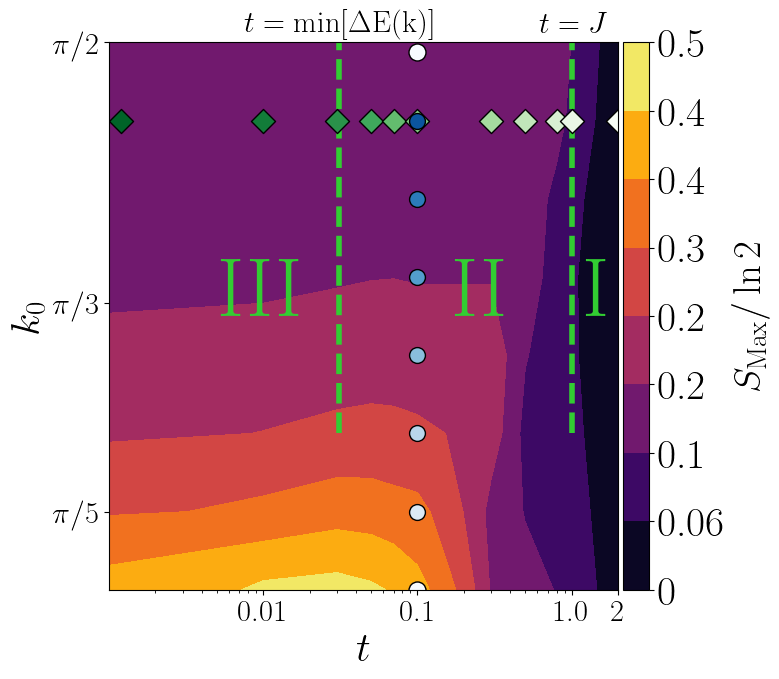

In [12]:
fig, ax = plt.subplots(1,1,figsize=(bwidth+1,bwidth))

vg_array = S_df.index
t_array = S_df.columns
im = ax.contourf(t_array, vg_array, S_df.values, cmap="inferno")
plt.xscale('log')

# Add anotate the regions
y_tick = np.pi/2 -0.04
ax.annotate(
    r'$t=\rm{min}[ \Delta E(k)]$', 
    xy=(np.pi/(LL+1), y_tick), 
    xytext=(np.pi/(LL+1), y_tick + 0.06), fontsize=22,ha='center')
ax.annotate(
    r'$t=J$', 
    xy=(J, y_tick), 
    xytext=(J, y_tick + 0.06), fontsize=22,ha='center')

# Add the labels for each region
ax.annotate('II', xy=(0.2+np.pi/50, 0.65*np.pi/2), 
            xytext=(0.2+np.pi/50, 0.65*np.pi/2),ha='center', c="limegreen", fontsize= 60,fontweight='bold')

ax.annotate('III', xy=(0.01, 0.65*np.pi/2), 
            xytext=(0.01, 0.65*np.pi/2),ha='center', c="limegreen", fontsize= 60,fontweight='bold')

ax.annotate('I', xy=(1.5, 0.65*np.pi/2), 
            xytext=(1.5, 0.65*np.pi/2),ha='center', c="limegreen", fontsize= 60,fontweight='bold')

ax.vlines([np.pi/(LL+1), J], ymin=0.5*np.pi/2, ymax=np.pi/2, color='limegreen', lw=4, linestyle="dashed", clip_on=False)  # tick-like line

# add first scatterplot points by hand
    
ax.scatter(t_unique[0]+ 0.0002,k0_, marker="D" ,s=150, edgecolor="black",color=colors_hor[0]) 

for ti in range(1,len(t_unique)-1):  
    ax.scatter(t_unique[ti], k0_ , marker="D" ,s=150, edgecolor="black",color=colors_hor[ti],zorder=5)
    
ax.scatter(t_unique[-1] - 0.0002, k0_, marker="D" ,s=150, edgecolor="black",color=colors_hor[-1])

ax.scatter(t_ , K0_unique[0], s=150, edgecolor="black",color=colors[0])
for ki in range(1,len(K0_unique)-1):
    ax.scatter(t_, K0_unique[ki], s=130, edgecolor="black",color=colors[ki], zorder=7)
ax.scatter(t_, K0_unique[-1]-0.02, s=150, edgecolor="black",color=colors[0])


ax.set_xticks( [0.01,0.1,1.0,2], [0.01,0.1,1.0,2] ,fontsize=22)
ax.set_yticks( [np.pi/5,np.pi/3,np.pi/2], labels=[r"$\pi/5$",r"$\pi/3$",r"$\pi/2$"],fontsize=22 )

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im, cax, shrink=0.9)   
cbar.ax.set_ylabel(r'$S_{\rm{Max}}/\ln{2}$', rotation=90, fontsize=28)
cbar.ax.yaxis.set_major_formatter(FormatStrFormatter('%.1g'))


ax.set_ylabel(r"$k_0$",fontweight='bold',fontsize=30)
ax.set_xlabel(r"$t$",fontweight='bold',fontsize=30)

plt.tight_layout()

plt.savefig(fig_route+"entropy_phase_diagram_MPS_L=100.pdf",transparent=True)

## Entropy Production

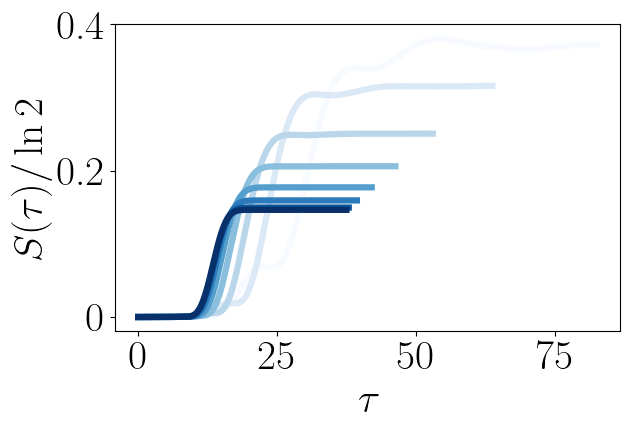

In [13]:
# Create 2x2 sub plots

fig, ax = plt.subplots(1,1, figsize=(bwidth-0.5,bheight))

for i in range(0,len(K0_unique)):
    # Entropy in time
    xvals = ver_df[ver_df["K0"]== K0_unique[i]]["times"].item()
    yvals = ver_df[ver_df["K0"]== K0_unique[i]]["entropy"].item()
    ax.plot(xvals,yvals, linewidth=4.5, color=colors[i])
    
ax.set_ylabel(r"$S(\tau)/\ln{2}$")
ax.set_xlabel(r"$\tau$")
ax.set_yticks([0,0.2, 0.4], [0,0.2, 0.4])
plt.tight_layout()
plt.savefig(fig_route+"entropy_tau_MPS_L=100.pdf",transparent=True)

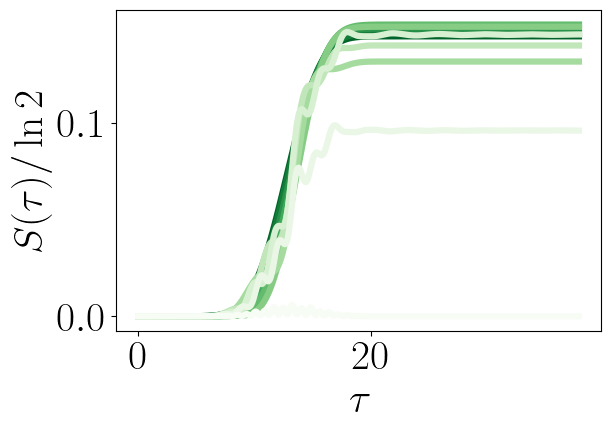

In [14]:
# Create 2x2 sub plots

fig, ax = plt.subplots(1,1, figsize=(bwidth-0.5,bheight))

for i in range(0,len(t_unique)):
    # Entropy in time
    xvals = hor_df[hor_df["t"]== t_unique[i]]["times"].item()
    yvals = hor_df[hor_df["t"]== t_unique[i]]["entropy"].item()
    ax.plot(xvals,yvals, linewidth=4.5, color=colors_hor[i])
    
ax.set_ylabel(r"$S(\tau)/\ln{2}$")
ax.set_xlabel(r"$\tau$")
#ax.set_yticks([0,0.2, 0.4], [0,0.2, 0.4])
plt.tight_layout()

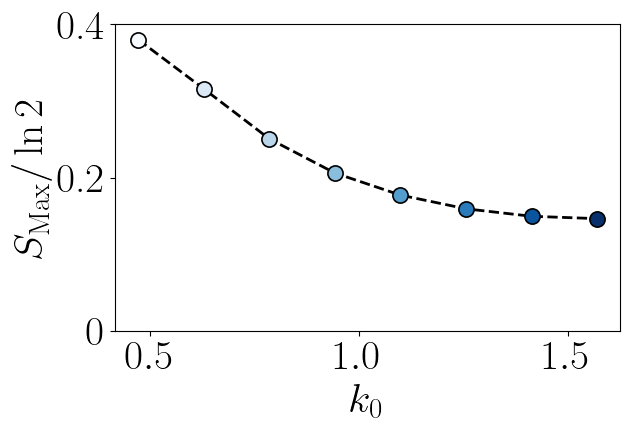

In [15]:
# Create 2x2 sub plots
fig, ax = plt.subplots(1,1, figsize=(bwidth-0.5,bheight))
line_x = []
line_y = []
for i in range(0,len(K0_unique)):
    # Entropy in time
    xvals = ver_df[ver_df["K0"]== K0_unique[i]]["K0"].item()
    yvals = ver_df[ver_df["K0"]== K0_unique[i]]["Max_entropy"].item()
    ax.scatter(xvals,yvals, linewidth=1.2, color=colors[i], s = 120, edgecolor="black")
    line_x.append(xvals)
    line_y.append(yvals)

plt.plot(line_x, line_y, linestyle= "dashed", linewidth=2,c="black", zorder=0)
    
ax.set_ylabel(r"$S_{\rm{Max}}/\ln{2}$")
ax.set_xlabel(r"$k_0$")
ax.set_yticks([0,0.2, 0.4], [0,0.2, 0.4])
plt.tight_layout()

plt.savefig(fig_route+"entropy_k0_MPS_L=100.pdf",transparent=True)

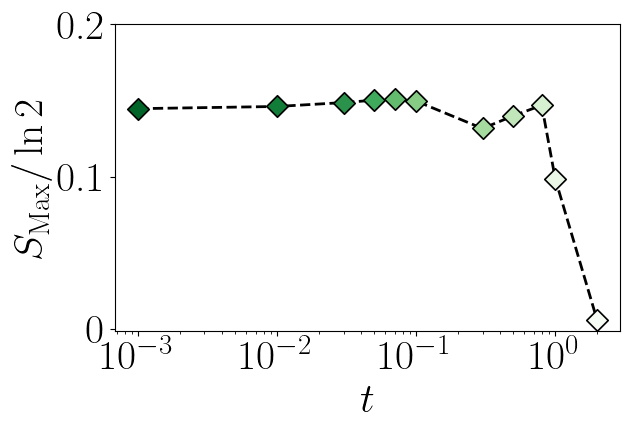

In [16]:
# Create 2x2 sub plots

fig, ax = plt.subplots(1,1, figsize=(bwidth-0.5,bheight))
line_x = []
line_y = []
for i in range(0,len(t_unique)):
    # Entropy in time
    xvals = hor_df[hor_df["t"]== t_unique[i]]["t"].item()
    yvals = hor_df[hor_df["t"]== t_unique[i]]["Max_entropy"].item()
    ax.scatter(xvals,yvals, linewidth=1.2, color=colors_hor[i], marker="D",s = 120, edgecolor="black")
    line_x.append(xvals)
    line_y.append(yvals)

plt.plot(line_x, line_y, linestyle= "dashed", linewidth=2,c="black", zorder=0)
    
ax.set_ylabel(r"$S_{\rm{Max}}/\ln{2}$")
ax.set_xlabel(r"$t$")
ax.set_xscale('log')

ax.set_yticks([0,0.1, 0.2], [0,0.1, 0.2])
plt.tight_layout()

plt.savefig(fig_route+"entropy_t_MPS_L=100.pdf",transparent=True)

Text(0.5, 0, '$t$')

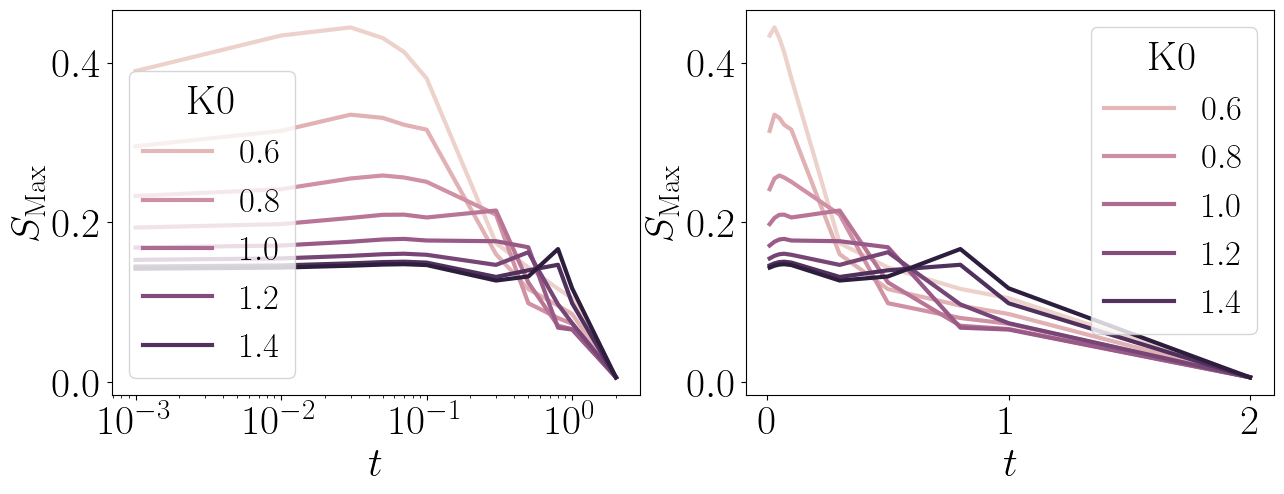

In [17]:
cond_ = (data_df["Omega"]==Om_)  & (data_df["X0"]==x0_) & (data_df["alfabond"]==af) & (data_df["t"]>0.0001)

fig, ax = plt.subplots(1,2, figsize=(2*bwidth, bheight))
sns.lineplot(data=data_df[cond_], x="t", y="Max_entropy", hue="K0", linewidth=3.0, ax = ax[0])
ax[0].set_xscale('log')
ax[0].set_ylabel(r"$S_{\rm{Max}}$")
ax[0].set_xlabel(r"$t$")

cond_ = (data_df["Omega"]==Om_)  & (data_df["X0"]==x0_) & (data_df["alfabond"]==af) & (data_df["t"]>=0.01)

sns.lineplot(data=data_df[cond_], x="t", y="Max_entropy", hue="K0", linewidth=3.0, ax = ax[1])
ax[1].set_ylabel(r"$S_{\rm{Max}}$")
ax[1].set_xlabel(r"$t$")